In [1]:
pip install -U pandas-datareader plotly

     |████████████████████████████████| 109 kB 5.5 MB/s 
     |████████████████████████████████| 25.3 MB 1.8 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
pip install prophet

     |████████████████████████████████| 65 kB 2.6 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 216 kB 9.6 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6639661 sha256=e17fc7afd4d636de636e6ab7a44653dedacf8ce30318dfe8ba6ad89188f14c0b
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


* Download the daily Yahoo stock history from 2001 to 2021 in
pandas-datareader.

In [3]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
from datetime import datetime

yahoo_data = DataReader('JPM', 'yahoo', datetime(2001, 6, 1), datetime(2021, 6, 1))
yahoo_df = yahoo_data['Adj Close'].to_frame().reset_index('Date')

* It gives us a pandas DataFrame with two columns, the adjusted daily closing
value and the date. 
* Check the datatypes of these two columns.

In [4]:
yahoo_df.head()

,Date,Adj Close
0,2001-06-01,26.777802
1,2001-06-04,27.111902
2,2001-06-05,26.564196
3,2001-06-06,25.654976
4,2001-06-07,24.992254


* The Date column is datetime in nanoseconds. Adj Close is of type float.

In [5]:
yahoo_df.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

* Feed this data set into the fit() method for training.
* Rename columns ds and y in order to stick to the Prophet
conventions. 

In [6]:
from prophet import Prophet

forecaster = Prophet()
forecaster.fit(yahoo_df.rename(columns={"Date": "ds", "Adj Close": "y"}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


* Create a new DataFrame that will have future dates. 
* Stick this DataFrame into the predict() method of the Prophet model.

In [7]:
future = forecaster.make_future_dataframe(periods=90)
future.tail()

,ds
5116,2021-08-26
5117,2021-08-27
5118,2021-08-28
5119,2021-08-29
5120,2021-08-30


* The forecast is calling the predict() method with this new DataFrame.
* The forecast DataFrame contains the upper and lower confidence intervals
alongside the forecast. 
* The ds columns is the date corresponding to the forecast.
* Inspect the forecasts by looking at the DataFrame.

In [8]:
forecast = forecaster.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5116,2021-08-26,127.208137,118.358343,136.125425
5117,2021-08-27,127.227278,118.366007,136.182569
5118,2021-08-28,129.119693,120.635912,137.751972
5119,2021-08-29,129.167009,120.456368,137.598022
5120,2021-08-30,127.326409,118.488003,136.600644


* Plot the forecasts against the actual data.
* The actual data is thick and bold, while the forecast is thinner. 
* The upper and lower confidence intervals are around the forecast.

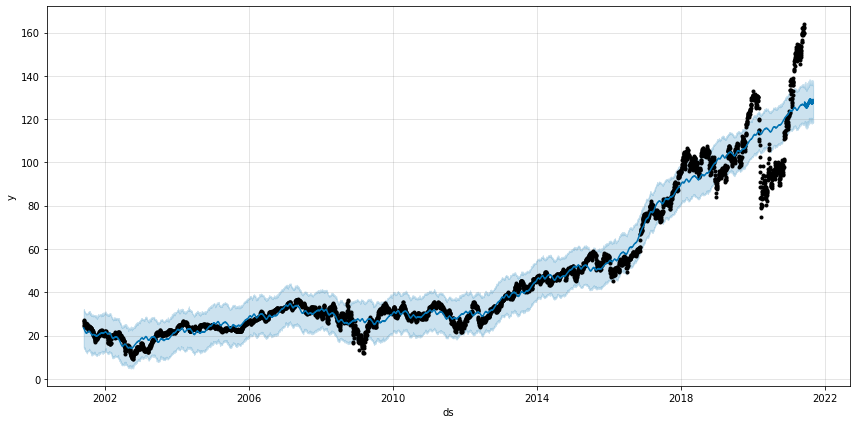

In [9]:
forecaster.plot(forecast, figsize=(12, 6));